<a href="https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/MultilayerPerceptron_4_versiones_de_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multilayer peceptron version 1
Este primer modelo sera construido apenas con una capa oculta 


In [0]:
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt

imponiendo semilla para reproduzir resultados

In [0]:
np.random.seed(1671)

Parametros de la red y de la etapa de entrenamiento

In [0]:
N_EPOCH = 200     # numero de iteraciones
BATCH_SIZE=128    # tamaño de cada lote por iteración
VERBOSE = 1       # se pone en uno para ver los resultados
N_CLASSES= 10     # numero de etiquetas del conjunto de entrenamiento
N_HIDDEN = 128    # número de neurones ocultos 
VALIDATION_SPLIT=0.2  # división del dataset en este caso 20% para teste


Generando dataset de entrenamiento y test

In [0]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

Como tenemos 60000 imagenes de 28x28 la entrada de la red debe ser en un unico vector por eso lo convertimos en un array de 60000x784, (28x28=784)

In [0]:
RESHAPE=784
x_train = x_train.reshape(60000,RESHAPE)
x_test = x_test.reshape(10000, RESHAPE)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
#normalizando los datos
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'ejemplos de datos de entrenamiento')
print(x_test.shape[0],'ejemplos de datos de test')

60000 ejemplos de datos de entrenamiento
10000 ejemplos de datos de test


Aplicamos la tecnica de one-hot encoding para convertir las clases en matrices que serán entregadas al conjunto de entrenamiento y de teste

In [0]:
y_train = np_utils.to_categorical(y_train,N_CLASSES)
y_test = np_utils.to_categorical(y_test,N_CLASSES)

Creamos nuestro modelo de una unica capa oculta

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(N_CLASSES, input_shape=(RESHAPE,)))
model.add(tf.keras.layers.Activation('softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Creamos el compilador

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='categorical_crossentropy',metrics=['accuracy'])

Entrenamos nuestro modelo con la funcion fit()

In [0]:
modelo_v1=model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=N_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Analisamos el rendimiento del modelo con los datos de teste

In [13]:
score = model.evaluate(x_test,y_test,verbose=VERBOSE)
#imprimimos la perdida y la tasa de acierto
print("\nTeste score:" ,score[0])
print("\nTeste tasa de acierto: ", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.9225

Teste score: 0.276999831199646

Teste tasa de acierto:  0.9225000143051147


# Multilayer perceptron version 2

En esta nueva versión vamos a mejorar la red anterior de una sola capa oculta, adicionando 2 capas ocultas y la funcion de activación ReLu

In [0]:
#Usando las variables e hiperparametros arriba configurados crearemos una nueva red para mejorar la precisión del modelo de la versión 1

#Creamos la arquitectura de la nueva red

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(N_HIDDEN,input_shape=(RESHAPE,)))
model_2.add(tf.keras.layers.Activation('relu'))
model_2.add(tf.keras.layers.Dense(N_HIDDEN))
model_2.add(tf.keras.layers.Activation('relu'))
model_2.add(tf.keras.layers.Dense(N_CLASSES))
model_2.add(tf.keras.layers.Activation('softmax'))


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
________________________________________________

In [0]:
model_2.compile(optimizer=tf.keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model_v2 = model_2.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=N_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

In [21]:
score = model_2.evaluate(x_test,y_test, verbose=VERBOSE)
#imprimimos la perdida y la tasa de acierto
print("\nTeste score:" ,score[0])
print("\nTeste tasa de acierto: ", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9757

Teste score: 0.07806980609893799

Teste tasa de acierto:  0.9757000207901001


#Multilayer perceptron versión 3

como se observa aumentando el número de capas ocultas de la red la precisión de esta mejora considerablemente en esta nueva versión mejoraremos aun mas con una nueva red que adiciona una capa de dropuot en las capas ocultas y aumenta el numero de epocas, esto con el fin de regularizar el entrenamiento y evitar el overfiting 

In [0]:
#Usando las variables e hiperparametros arriba configurados solo modificamos el numero de epocas y crearemos una nueva red para mejorar la precisión del modelo de la versión 2

#Creamos la arquitectura de la nueva red

N_EPOCH = 250
DROPOUT = 0.3

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(N_HIDDEN,input_shape=(RESHAPE,)))
model_3.add(tf.keras.layers.Activation('relu'))
model_3.add(tf.keras.layers.Dropout(DROPOUT))
model_3.add(tf.keras.layers.Dense(N_HIDDEN))
model_3.add(tf.keras.layers.Activation('relu'))
model_3.add(tf.keras.layers.Dropout(DROPOUT))
model_3.add(tf.keras.layers.Dense(N_CLASSES))
model_3.add(tf.keras.layers.Activation('softmax'))

In [23]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [0]:
model_3.compile(optimizer=tf.keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model_v3 = model_3.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=N_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

In [26]:
score = model_2.evaluate(x_test,y_test, verbose=VERBOSE)
#imprimimos la perdida y la tasa de acierto
print("\nTeste score:" ,score[0])
print("\nTeste tasa de acierto: ", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9757

Teste score: 0.07806980609893799

Teste tasa de acierto:  0.9757000207901001


Graficamos como el error del modelo se va estabilizando a medida que la epocas avanzan 

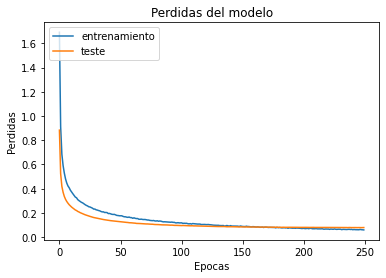

In [30]:
plt.plot(model_v3.history['loss'])
plt.plot(model_v3.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['entrenamiento','teste'], loc='upper left')
plt.show()

#Multilayer perceptron versión 4
En esta nueva versión de la red vamos a alterar el optimizador, las tres anteriores usaron el SGD, en esta ocasión vamos a usar los optimizadores RMSprop y ADAM que son una version mejorada del optimizador SGD

In [0]:
#Usando las variables e hiperparametros arriba configurados solo modificamos los optimizadores y crearemos una nueva red para mejorar la precisión del modelo de la versión 3

#Creamos la arquitectura de la nueva red

N_EPOCH = 250
DROPOUT = 0.3

model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(N_HIDDEN,input_shape=(RESHAPE,)))
model_4.add(tf.keras.layers.Activation('relu'))
model_4.add(tf.keras.layers.Dropout(DROPOUT))
model_4.add(tf.keras.layers.Dense(N_HIDDEN))
model_4.add(tf.keras.layers.Activation('relu'))
model_4.add(tf.keras.layers.Dropout(DROPOUT))
model_4.add(tf.keras.layers.Dense(N_CLASSES))
model_4.add(tf.keras.layers.Activation('softmax'))

In [33]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

Es en la compilación donde vamos a intentar mejorar el modelo esta vez cambiando para un optimizador RMSprop o Adam

In [0]:
#model_4.compile(optimizer=tf.keras.optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])
model_4.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model_v4 = model_4.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=N_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

In [41]:
score = model_2.evaluate(x_test,y_test, verbose=VERBOSE)
#imprimimos la perdida y la tasa de acierto
print("\nTeste score:" ,score[0])
print("\nTeste tasa de acierto: ", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9757

Teste score: 0.07806980609893799

Teste tasa de acierto:  0.9757000207901001


Con esta nueva configuracion cambiando el optimizador para RMSprop no se obtuvieron mejoras con respecto al modelo 3. 
Por otro lado con el optimizador Adam se obtuvo un rendimiento ligeramente mayor de casi 1% en la etapa de entrenamiento que en grandes conjuntos de datos resulta ser bastante prometedor pero en la etapa de test se conservo el mismo del modelo3

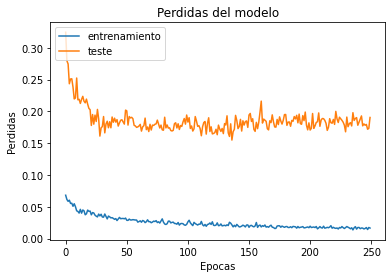

In [43]:
plt.plot(model_v4.history['loss'])
plt.plot(model_v4.history['val_loss'])
plt.title('Perdidas del modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['entrenamiento','teste'], loc='upper left')
plt.show()